# Hydrogen Atom in a Magnetic Field 

## Understand the Quantum System

In this project, we aim to simulate the hydrogen atom in a magnetic field, specifically analyzing the Zeeman effect, where the atomic spectral lines split due to the interaction of the atom's magnetic moment with the external field.

### Hamiltonian of the System

The Hamiltonian of the hydrogen atom in a magnetic field is given by:

$$
 H = H_0 + H_B 
$$

where:

- **\( $H_0$ \)** is the unperturbed Hamiltonian of the hydrogen atom. This describes the system without any external perturbations.
  
- **\($ H_B$ \)** is the perturbation Hamiltonian due to the external magnetic field. It is given by:

$$ H_B = -\boldsymbol{\mu} \cdot \mathbf{B} $$

Here:

- **\( $\boldsymbol{\mu} $\)** is the magnetic moment of the atom, which is given by:

$$ \boldsymbol{\mu} = -\frac{e}{2m_e} \mathbf{L} $$

where:

  - **\($ e $\)** is the electron charge,
  - **\($ m_e $ \)** is the electron mass,
  - **\($ \mathbf{L} $\)** is the orbital angular momentum of the electron.

- **\($ \mathbf{B} $\)** is the external magnetic field applied to the atom.

### Zeeman Effect

In the Zeeman effect, the focus is on how the magnetic field interacts with the orbital angular momentum **\( $\mathbf{L}$ \)** of the electron. The splitting of spectral lines observed is due to this interaction.

This interaction leads to the splitting of energy levels and is observed as multiple spectral lines when the atom is subjected to a magnetic field. The study of this effect provides insights into atomic and quantum mechanics.


# Set Up the Quantum Circuit

We'll use a quantum circuit to simulate this system. Each qubit can represent a basis state of the atom. The simulation will require encoding the hydrogen atom's state and applying gates to simulate the interaction with the magnetic field.

In [8]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a device we specify number of qubits and we choose default device as that is good for default simulation without a real processor
n_qubits = 2  # Adjust the number of qubits as needed 
dev = qml.device("default.qubit", wires=n_qubits)

### Quantum Gates and Their Matrices

1. **Hadamard Gate (H)**
   The Hadamard gate creates a superposition state. Its matrix representation is:
   $$
   H = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 1 \\
   1 & -1
   \end{pmatrix}
   $$

2. **Rotation Gate (RX)**
   The RX gate rotates around the X-axis of the Bloch sphere. Its matrix representation is:
   $$
   R_X(\theta) = \begin{pmatrix}
   \cos(\theta/2) & -i\sin(\theta/2) \\
   -i\sin(\theta/2) & \cos(\theta/2)
   \end{pmatrix}
   $$
   where \(\theta\) is the rotation angle.

3. **Rotation Gate (RY)**
   The RY gate rotates around the Y-axis of the Bloch sphere. Its matrix representation is:
   $$
   R_Y(\theta) = \begin{pmatrix}
   \cos(\theta/2) & -\sin(\theta/2) \\
   \sin(\theta/2) & \cos(\theta/2)
   \end{pmatrix}
   $$
   where \(\theta\) is the rotation angle.

4. **Controlled-NOT Gate (CNOT)**
   The CNOT gate is a two-qubit gate where one qubit acts as the control and the other as the target. Its matrix representation is:
   $$
   \text{CNOT} = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0
   \end{pmatrix}
   $$

5. **Rotation Gate (RZ)**
   The RZ gate rotates around the Z-axis of the Bloch sphere. Its matrix representation is:
   $$
   R_Z(\phi) = \begin{pmatrix}
   e^{-i\phi/2} & 0 \\
   0 & e^{i\phi/2}
   \end{pmatrix}
   $$
   where \(\phi\) is the rotation angle.




In [3]:
@qml.qnode(dev) #marks function as a quantum node to be executed on quantum device
def zeeman_effect_simulation(params):
    # Initialize the hydrogen atom state (applying hadamard gates to both 0 and 1 to create a superposition state)
    qml.Hadamard(wires=0) 
    qml.Hadamard(wires=1)
    
    # Simulate the Zeeman effect by applying rotations based on the magnetic field RX is rotation around X axius and RY is rotation around Y axis of the Bloch sphere dependent on angle of rotation that will be given by params
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)

    # Include additional gates to represent the interaction with the magnetic field
    qml.CNOT(wires=[0, 1]) #  Controlled-NOT (CNOT) gate with qubit 0 as the control qubit and qubit 1 as the target qubit. This gate introduces entanglement between the qubits
    qml.RZ(params[2], wires=0) # rotation around the Z-axis of the Bloch sphere to qubit 0. The angle of rotation is given by params[2]
    qml.RZ(params[3], wires=1)# rotation around the Z-axis of the Bloch sphere to qubit 1. The angle of rotation is given by params[3]

    # Measure the expectation values (e.g., Pauli-Z on both qubits) (function measures the expectation value of the Pauli-Z observable on qubit i.)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

### Quantum Circuit Breakdown

1. **Initialization with Hadamard Gates:**
   - **Qubit 0:** Apply Hadamard gate \(H\).
   - **Qubit 1:** Apply Hadamard gate \(H\).

   The combined state of the system after the Hadamard gates can be represented as:
   $$
   |\psi\rangle = H \otimes H \cdot |00\rangle
   $$

2. **Rotation Gates:**
   - **Qubit 0:** Apply \(R_X(params[0])\).
   - **Qubit 1:** Apply \(R_Y(params[1])\).

   After applying the rotations, the combined state becomes:
   $$
   |\psi\rangle = (R_X(params[0]) \otimes R_Y(params[1])) \cdot (H \otimes H) \cdot |00\rangle
   $$

3. **Controlled-NOT Gate:**
   Apply CNOT gate with qubit 0 as control and qubit 1 as target:
   $$
   |\psi\rangle = \text{CNOT} \cdot (R_X(params[0]) \otimes R_Y(params[1])) \cdot (H \otimes H) \cdot |00\rangle
   $$

4. **Additional Rotation Gates:**
   - **Qubit 0:** Apply \(R_Z(params[2])\).
   - **Qubit 1:** Apply \(R_Z(params[3])\).

   The final state of the system is:
   $$
   |\psi\rangle = (R_Z(params[2]) \otimes R_Z(params[3])) \cdot \text{CNOT} \cdot (R_X(params[0]) \otimes R_Y(params[1])) \cdot (H \otimes H) \cdot |00\rangle
   $$

5. **Measurement:**
   - Measure the expectation values of the Pauli-Z operator on each qubit:
   $$
   \langle Z_0 \rangle = \langle \psi | Z \otimes I | \psi \rangle
   $$
   $$
   \langle Z_1 \rangle = \langle \psi | I \otimes Z | \psi \rangle
   $$



So now we have set up a quantum simulation to model the Zeeman effect, where the state of the hydrogen atom (represented by qubits) is manipulated using quantum gates to simulate the interaction with a magnetic field. The quantum circuit includes Hadamard gates for state initialization, rotation gates to represent the Zeeman effect, and a CNOT gate to introduce entanglement. The final result is the measurement of expectation values for the Pauli-Z operator, providing insights into the quantum state after the operations.

In [10]:
# Initialize parameters representing the strength of the magnetic field interaction (here choosing random values for the angles or params just to test)
params = np.array([0.1, 0.2, 0.3, 0.4], requires_grad=True)

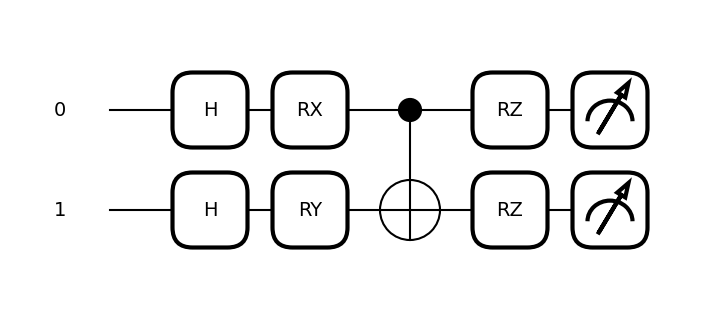

In [11]:
# Draw the circuit using matplotlib
fig, ax = qml.draw_mpl(zeeman_effect_simulation)(params)
plt.show()

### Relating Parameters to Magnetic Field

To relate these parameters to the magnetic field strength \( B \), assume the following proportional relationships:

$$
\theta_{RX} = k_x \cdot B
$$

$$
\theta_{RY} = k_y \cdot B
$$

$$
\theta_{RZ} = k_z \cdot B
$$

where $\theta_{RX}$, $\theta_{RY}$, and $\theta_{RZ}$ are the rotation angles for RX, RY, and RZ gates, respectively, and $ k_x $, $ k_y $, and $ k_z $ are constants depending on the system being modeled.

In [12]:
# Run the simulation
result = zeeman_effect_simulation(params)
print(f"Result: {result}")

Result: [tensor(0., requires_grad=True), tensor(0., requires_grad=True)]


Expectation Value: The expectation value of an operator (such as Pauli-Z) represents the average outcome you would get if you measured that operator many times on the quantum state.
This result means that for both qubits, the expectation value of the Pauli-Z operator is 0. A result of 0 indicates that the qubit's state is in a superposition, where the positive and negative contributions to the expectation value cancel each other out.

In [7]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

def cost(params):
    return zeeman_effect_simulation(params)[0]  # Example: Optimize based on the first qubit

for i in range(20):
    params = opt.step(cost, params)
    print(f"Step {i}, Cost: {cost(params)}")

print(f"Optimized parameters: {params}")


Step 0, Cost: 0.0
Step 1, Cost: 0.0
Step 2, Cost: 0.0
Step 3, Cost: 0.0
Step 4, Cost: 0.0
Step 5, Cost: 0.0
Step 6, Cost: 0.0
Step 7, Cost: 0.0
Step 8, Cost: 0.0
Step 9, Cost: 0.0
Step 10, Cost: 0.0
Step 11, Cost: 0.0
Step 12, Cost: 0.0
Step 13, Cost: 0.0
Step 14, Cost: 0.0
Step 15, Cost: 0.0
Step 16, Cost: 0.0
Step 17, Cost: 0.0
Step 18, Cost: 0.0
Step 19, Cost: 0.0
Optimized parameters: [0.1 0.2 0.3 0.4]


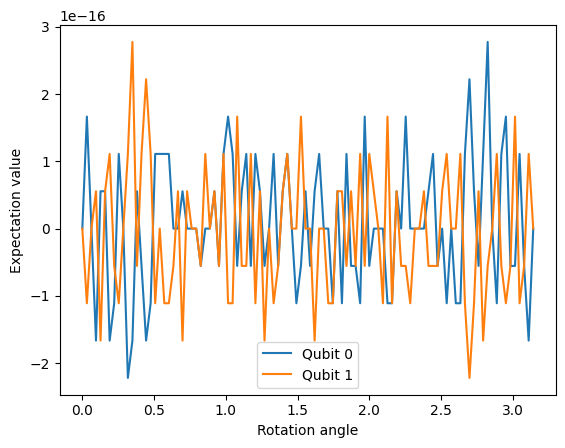

In [8]:
import matplotlib.pyplot as plt

angles = np.linspace(0, np.pi, 100)
results = [zeeman_effect_simulation([angle, 0.2, 0.3, 0.4]) for angle in angles]

plt.plot(angles, [res[0] for res in results], label='Qubit 0')
plt.plot(angles, [res[1] for res in results], label='Qubit 1')
plt.xlabel('Rotation angle')
plt.ylabel('Expectation value')
plt.legend()
plt.show()


Let's test with different parameters

In [13]:
params = np.array([np.pi/4, np.pi/6, np.pi/3, np.pi/2], requires_grad=True)


In [14]:
# Run the simulation
result = zeeman_effect_simulation(params)
print(f"Result: {result}")

Result: [tensor(5.55111512e-17, requires_grad=True), tensor(5.55111512e-17, requires_grad=True)]


In [15]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

def cost(params):
    return zeeman_effect_simulation(params)[0]  # Example: Optimize based on the first qubit

for i in range(20):
    params = opt.step(cost, params)
    print(f"Step {i}, Cost: {cost(params)}")

print(f"Optimized parameters: {params}")


Step 0, Cost: 5.551115123125783e-17
Step 1, Cost: 5.551115123125783e-17
Step 2, Cost: 5.551115123125783e-17
Step 3, Cost: 5.551115123125783e-17
Step 4, Cost: 5.551115123125783e-17
Step 5, Cost: 5.551115123125783e-17
Step 6, Cost: 5.551115123125783e-17
Step 7, Cost: 5.551115123125783e-17
Step 8, Cost: 5.551115123125783e-17
Step 9, Cost: 5.551115123125783e-17
Step 10, Cost: 5.551115123125783e-17
Step 11, Cost: 5.551115123125783e-17
Step 12, Cost: 5.551115123125783e-17
Step 13, Cost: 5.551115123125783e-17
Step 14, Cost: 5.551115123125783e-17
Step 15, Cost: 5.551115123125783e-17
Step 16, Cost: 5.551115123125783e-17
Step 17, Cost: 5.551115123125783e-17
Step 18, Cost: 5.551115123125783e-17
Step 19, Cost: 5.551115123125783e-17
Optimized parameters: [0.78539816 0.52359878 1.04719755 1.57079633]


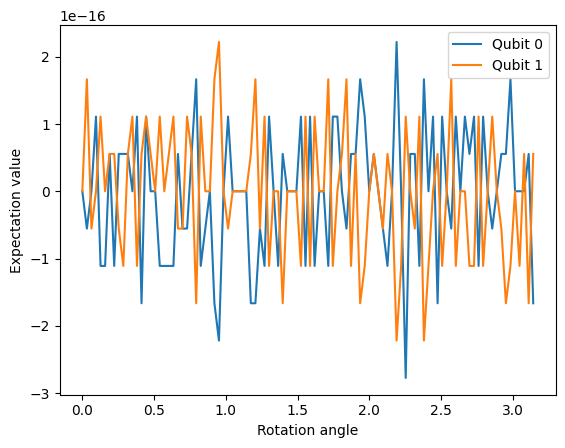

In [19]:
import matplotlib.pyplot as plt

angles = np.linspace(0, np.pi, 100)
results = [zeeman_effect_simulation([angle,np.pi/6, np.pi/3, np.pi/2]) for angle in angles]

plt.plot(angles, [res[0] for res in results], label='Qubit 0')
plt.plot(angles, [res[1] for res in results], label='Qubit 1')
plt.xlabel('Rotation angle')
plt.ylabel('Expectation value')
plt.legend()
plt.show()

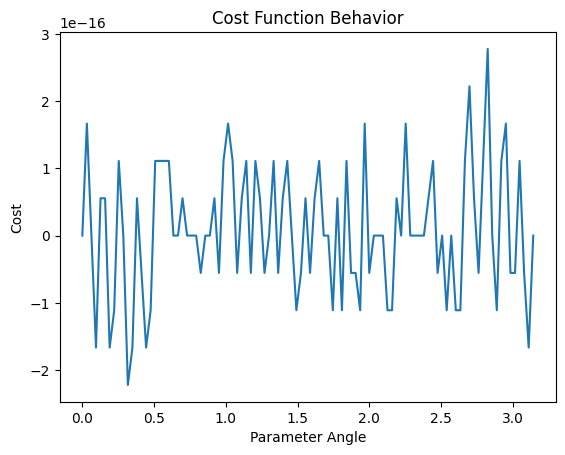

In [18]:
angles = np.linspace(0, np.pi, 100)
costs = [cost(np.array([angle, 0.2, 0.3, 0.4])) for angle in angles]

plt.plot(angles, costs)
plt.xlabel('Parameter Angle')
plt.ylabel('Cost')
plt.title('Cost Function Behavior')
plt.show()